## Principal Component Analysis
I've always had this issue of trying to visualize data but struggle to do so due to high dimentionality. There is however a solution that allows me to 'compress' these datasets to only just a few features without loosing too much information - Principal Component Analysis! It is a unsupervised learning algorithm that can be used to filter out noise and perform feature extraction and visualize high-dimensional data. I've broken down this piece into 2 parts, where i'll first explore the concept at using iris data set at the start before moving onto more exciting samples in the second half. A lot of the content is drawn from [Jake Vanderplas's work](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) and it really helped me get a better grip on how PCA works. 

1. [Iris Data](#t1.0)
    * 1.1 [Load Iris Data](#t1.1)
    * 1.2 [Performing PCA](#t1.2)
    * 1.3 [Visualizing after PCA](#t1.3)
    * 1.4 [Explained Variance Ratio](#t1.4)
2. [Hand Written Digits](#t2.0)
    * 2.1 [Visualizing Digits Dataset](#t2.1)
    * 2.2 [Cummulative sum of variance](#t2.2)
3. [Labelled faces in the wild](#t3.0)


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

<a id="t1.0"></a>
## Iris Data
<a id="t1.1"></a>
#### 1.1 Load Iris Data
We will be getting the iris data from UCI and practice some slicing on along the way

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In this iris dataset, we have 4 features for each observations. If you attempt to visualize it on a 2D plot, you can only plot 2 features on it at any time, with 3 features being the most if we use a 3D plot as shown below. Assuming that we don't have any labels on our dataset and that business wants to know if there are any form of clusters, how else can we do it?  

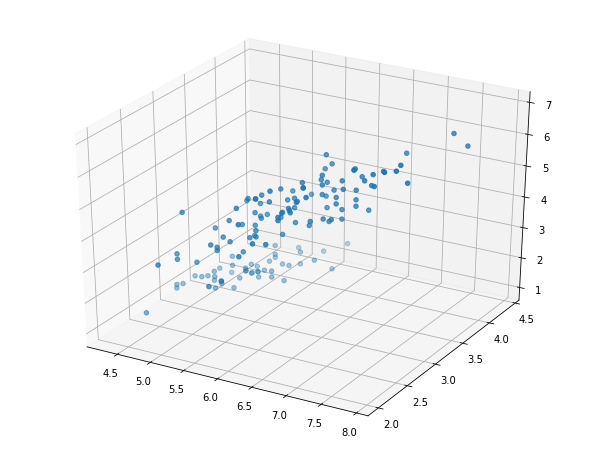

In [3]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0], df.iloc[:,1],df.iloc[:,2]) # figure out how to colour the dots

The answer to the question above is Principal Component Analysis. PCA is a mathematical procedure that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables called principal components. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible. The goal of PCA is dimension reduction and there is no guarantee that the dimensions are interpretable, which could serve as a problem when trying to explain to someone else.

Before we perform PCA on our dataset, we must first normalize it since it is a variance maximizing exercise. For example, if you change one variable from km to cm (increasing its variance), it may go from having little impact to dominating the first principal component.Rescaling and standardizing variables would avoid that pitfall.

[some help from the community](https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca) <br>


In [4]:
column_names = ['sepal length','sepal width','petal length','petal width']
X = df.iloc[:,:4].values
y = df.iloc[:,4].values

# Scaling our variables
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
df_scale = pd.DataFrame(X_trans, columns= column_names)
df_scale.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


<a id="t1.2"></a>
#### 1.2 Performing PCA 

In [5]:
# Specifying only 2 components for the iris dataset
pca = PCA(n_components=2) # creating a covariance matrix
principalComponents = pca.fit_transform(X) #after fit and transforming, its now in array, so we need to put it in dataframe
pcaDf = pd.DataFrame(data = principalComponents, columns=['principal component 1','principal component 2'])
#inspecting the new dataframe
pcaDf.head(5)

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [6]:
# stitching the labels back together with the data
finalDf = pd.concat([pcaDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


<a id="t1.3"></a>
#### 1.3 Visualizing data after PCA

now that we've reduced our dataset to 2 components, we can clearly see that the species are different from one another and that clustering can be easily performed in this case.

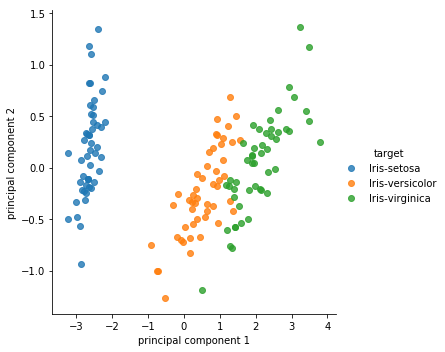

In [7]:
sns.lmplot(x = 'principal component 1', y = 'principal component 2', data = finalDf, hue = 'target', fit_reg=False)

<a id="t1.4"></a>
#### 1.4 Explained variance ratio

In [8]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

The first 2 components contains 97% of the information, with the first component containing 92.4% and the second component containing 5.3%. The explained variance basically tells us how much information can be attributed to each of the principal components. You can choose to have as many principal components as you like, then you'll have a view of how much information is contained in each principal component and decide how much you need later on. In the example above, we've chosen only 2. 

<a id="t2.0"></a>
### 2. Hand written digits

The images in the digits dataset is made up of 8x8 or 64 dimentional points. What PCA does is it finds the optimal stretch and rotation in 64-dimentional space that allows us to see the layout of the digits in two dimentions (or your choice). It discovers a set of basis functions that are more efficient than the native pixel basis of the input data

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
# we have 1797 observations in the digits dataset and 64 features

(1797, 64)

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(digits.data)
print('Before performing dimention reduction', digits.data.shape)
print('Before performing dimention reduction', principalComponents.shape)
# Notice how the number of features reduced from 64 to 2? 

Before performing dimention reduction (1797, 64)
Before performing dimention reduction (1797, 2)


<a id="t2.1"></a>
#### 2.1 Visualizing digits dataset

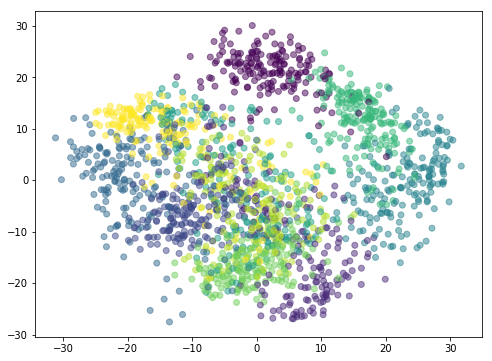

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=digits.target, alpha = 0.5)

<a id="t2.2"></a>
#### 2.2 Cummulative sum of variance

So how do we know how many components to actually choose? Lets perform PCA again on the dataset, without defining how many components we want so we are able to see the cummulative information retained as we add more components. The graph below basically shows you how much of the total variance is contained within the first N components. For example, we can see that the first 10 components contains approximately 70% of the variance

Text(0,0.5,'cumulative explained variance')

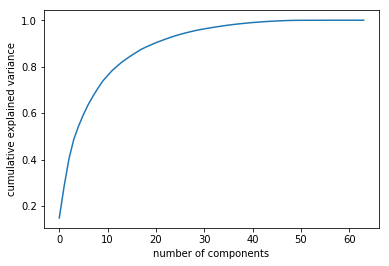

In [12]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#### Visualizing digits data

In [30]:
# borrowed code from jake vanderplas
def plot_digits(data):
    fig, axes = plt.subplots(4,10, figsize=(10,4),
                            subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary',interpolation = 'nearest',
                 clim=(0,16))

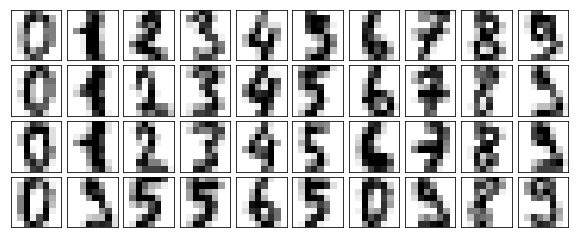

In [31]:
plot_digits(digits.data)

Now lets perform PCA and preserve 50% of the variance on the digits dataset then visualize it. It's very clear that the images that uses 50% of the variance is not as sharp as the original ones, hence demonstrating how PCA reduces noise. 

In [22]:
pca = PCA(0.5).fit(digits.data)
pca.n_components_

5

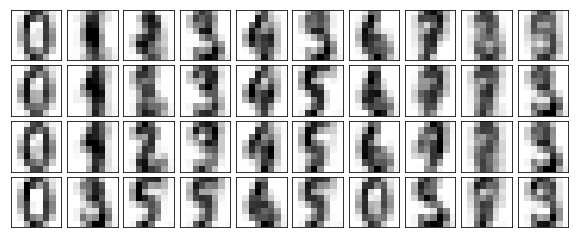

In [23]:
components = pca.transform(digits.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

<a id="t3.0"></a>
### 3. Labelled faces in the Wild

Here, we are experimenting with labelled faces in the wild dataset, where i will try out randomized PCA to speed up the process of PCA. Pending on the size of the data, randomized PCA can prove to be extremely useful. Here its just a fun little exercise to play with. 

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60) # h = 62 and w=47
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [32]:
# randomized PCA, specifying 50 components
pca = PCA(50, svd_solver = 'randomized')
components = pca.fit_transform(faces.data)

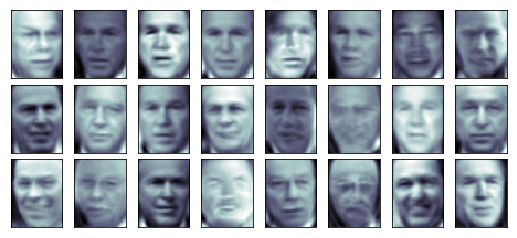

In [33]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
filtered = pca.inverse_transform(components)
for i, ax in enumerate(axes.flat):
    ax.imshow(filtered[i].reshape(62, 47), cmap = 'bone')

Text(0,0.5,'cumulative explained variance')

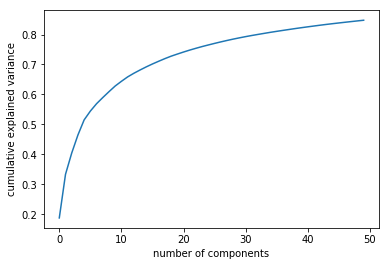

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

 **Jake Vanderplas**

>Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio). Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.